In [6]:
from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris

#惑星がclassオブジェクトとして定義されている
from poliastro.bodies import Sun, Earth, Mars
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.twobody import Orbit
from poliastro.plotting import StaticOrbitPlotter
from poliastro.plotting.misc import plot_solar_system
from poliastro.util import time_range, norm

In [11]:
#Horizons Systemから取得したデータを読み込む
import numpy as np
dart_position = np.loadtxt('data/DART.csv', delimiter=',', dtype=np.float64,skiprows=1, usecols=[2, 3, 4], encoding='utf-8')
dart_position_x,dart_position_y,dart_position_z=dart_position[:,0],dart_position[:,1],dart_position[:,2]

astropy.coordinatesで座標を定義する

In [8]:
from astropy.coordinates import CartesianRepresentation
dart_coordinates=CartesianRepresentation(x=dart_position_x,\
                                    y=dart_position_y,\
                                    z=dart_position_z,unit= u.km)

In [9]:
EPOCH = Time("2021-12-01 00:00:00", scale="tdb")

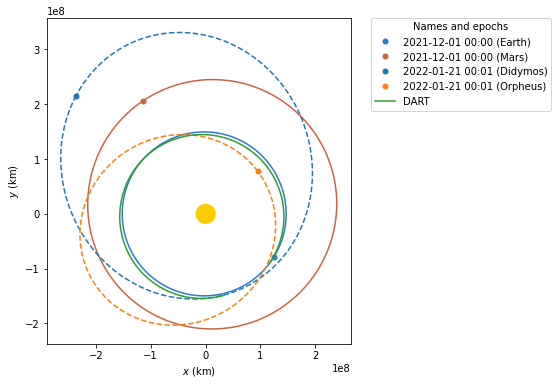

In [10]:
plotter = StaticOrbitPlotter()
plotter.plot_body_orbit(Earth, EPOCH, label="Earth")
plotter.plot_body_orbit(Mars, EPOCH, label="Mars")

#NAS/JPLよりdidymosの軌道データを呼び出して軌道を計算させる
didymos_orbit= Orbit.from_sbdb("65803")
plotter.plot(didymos_orbit, label="Didymos")

#NAS/JPLよりorpheusの軌道データを呼び出して軌道を計算させる
didymos_orbit= Orbit.from_sbdb("3361")
plotter.plot(didymos_orbit, label="Orpheus")
plotter.plot_trajectory(dart_coordinates,label="DART", trail=False)[0]
